Kelompok : 
- Irena Kusuma Dewi - 187006002 (A)
- Yuda Maulana - 187006011 (A)
- Nopi Pazriah - 187006012 (A)

UAS Intelijen Bisnis

Tema : Pendidikan

Judul : Analisis Sentimen Pendidikan Inklusif Pada Twitter Menggunakan Metode Multinomial Regresi Logistik

In [ ]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import API 
from tweepy import Cursor
from tweepy import Stream
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

In [ ]:
ACCESS_TOKEN = "1411959776972402690-WyviExK346KfBOyMUHjYD2Kv7YAEH2"
ACCESS_TOKEN_SECRET = "vX2J4DizOIDVVUmUSSS9Dqsnb39XICwzAjmeL5dAlic6S"
CONSUMER_KEY = "LaB55Mt6KPwH57aKPI7zru6dv"
CONSUMER_SECRET = "jKi0dish3cN7DEb9Z10NZ67tRyFBwxI7Fo1ksXOkAFexHryA5S"

In [ ]:
class TwitterClient():
    def __init__(self, user_twitter=None):
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)

        self.user_twitter = user_twitter

    def get_twitter_client_api(self):
        return self.twitter_client

    def get_user_timeline_tweets(self, num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.user_twitter).items(num_tweets):
            tweets.append(tweet)
        return tweets

    def get_friend_list(self, num_friends):
        friend_list = []
        for friend in Cursor(self.twitter_client.friends, id=self.user_twitter).items(num_friends):
            friend_list.append(friend)
        return friend_list

    def get_home_timeline_tweets(self, num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.home_timeline, id=self.user_twitter).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets

In [ ]:
class TwitterAuthenticator():

    def authenticate_twitter_app(self):
        auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
        auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
        return auth

In [ ]:
class TwitterStreamer():
    def __init__(self):
        pass

    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        listener = StdOutListener(fetched_tweets_filename)
        auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
        auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
        stream = Stream(auth, listener)

        stream.filter(track=hash_tag_list)

In [ ]:
class TwitterListener(StreamListener):
    def __init__(self, fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename

    def on_data(self, data):
        try:
            print(data)
            with open(self.fetched_tweets_filename, 'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("Error on_data %s" % str(e))
        return True
          
    def on_error(self, status):
        if status == 420:
            return False
        print(status)

class TweetAnalyzer():
    
    def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

    def analyze_sentiment(self, tweet):
        analysis = TextBlob(self.clean_tweet(tweet))
        
        if analysis.sentiment.polarity > 0:
            return 1
        elif analysis.sentiment.polarity == 0:
            return 0
        else:
            return -1
    
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=["tweets"])
        df["No"] = np.arange(start = 1, stop = len(df)+1)
        df["Id"] = np.array([tweet.id for tweet in tweets])
        df["Date"] = np.array([tweet.created_at for tweet in tweets])
        df["Likes"] = np.array([tweet.favorite_count for tweet in tweets])
        df["Retweets"] = np.array([tweet.retweet_count for tweet in tweets])
        df = df[["No", "tweets", "Id", "Date", "Likes", "Retweets"]]
        return df

 
if __name__ == '__main__':

    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()

    api = twitter_client.get_twitter_client_api()
    
    tweets = api.search(q="inclusive education", count=100)


    df = tweet_analyzer.tweets_to_data_frame(tweets)
    df["sentiment"] = np.array([tweet_analyzer.analyze_sentiment(tweet) for tweet in df["tweets"]])

In [ ]:
df

,No,tweets,Id,Date,Likes,Retweets,sentiment
0,1,RT @tweetsbymidge: Really nice post from @amee...,1414685894607458332,2021-07-12 20:39:35,0,4,1
1,2,RT @RepStricklandWA: It was a pleasure to meet...,1414685469158232074,2021-07-12 20:37:54,0,8,1
2,3,RT @SaraMoll_Vin: .@WineBizSSU has launched an...,1414682289821323264,2021-07-12 20:25:16,0,1,1
3,4,RT @Phenix_le_Chat: @Twitter @TwitterFrance Me...,1414680651098431496,2021-07-12 20:18:45,0,1,0
4,5,@Twitter @TwitterFrance Merci de virer ces pub...,1414679906714333185,2021-07-12 20:15:47,2,1,0
...,...,...,...,...,...,...,...
95,96,@jkenney Cost of living will soon be our ONLY ...,1414614183434358786,2021-07-12 15:54:38,18,1,1
96,97,@ManMadeMoon @JolyonRubs I agree but i think (...,1414613845256065024,2021-07-12 15:53:17,0,0,-1
97,98,RT @SkillnetK: TOMORROW!\nJoin our Skillnet we...,1414613265703964677,2021-07-12 15:50:59,0,1,1
98,99,RT @somegoodideas: The @PADeptofEd Bureau of S...,1414612890657726471,2021-07-12 15:49:30,0,3,1


In [ ]:
positive_count = df[df.sentiment == 1].count()
neutral_count = df[df.sentiment == 0].count()
negative_count = df[df.sentiment == -1].count()
print("Positif: ",positive_count["sentiment"])
print("Negatif: ",negative_count["sentiment"])
print("netral: ", neutral_count["sentiment"])

Positif:  44
Negatif:  12
netral:  44


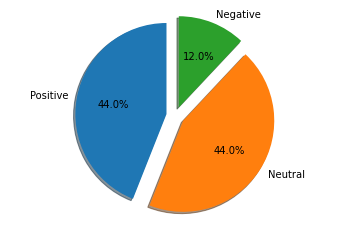

In [ ]:
labels = 'Positive', 'Neutral', 'Negative'
sizes = [positive_count["sentiment"], neutral_count["sentiment"], negative_count["sentiment"]]
explode = (0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

**Data Wrangling**

Pada proses ini akan dilakukan data wrangling untuk memeriksa apakah terdapat data yang null/kosong, selain itu untuk mengecek format data apakah sudah sesuai dengan yang di inginkan. Tujuannya adalah untuk mempermudah pada saat melakukan analisis dengan menggunakan regresi logistik. 

In [ ]:
df

,No,tweets,Id,Date,Likes,Retweets,sentiment
0,1,RT @tweetsbymidge: Really nice post from @amee...,1414685894607458332,2021-07-12 20:39:35,0,4,1
1,2,RT @RepStricklandWA: It was a pleasure to meet...,1414685469158232074,2021-07-12 20:37:54,0,8,1
2,3,RT @SaraMoll_Vin: .@WineBizSSU has launched an...,1414682289821323264,2021-07-12 20:25:16,0,1,1
3,4,RT @Phenix_le_Chat: @Twitter @TwitterFrance Me...,1414680651098431496,2021-07-12 20:18:45,0,1,0
4,5,@Twitter @TwitterFrance Merci de virer ces pub...,1414679906714333185,2021-07-12 20:15:47,2,1,0
...,...,...,...,...,...,...,...
95,96,@jkenney Cost of living will soon be our ONLY ...,1414614183434358786,2021-07-12 15:54:38,18,1,1
96,97,@ManMadeMoon @JolyonRubs I agree but i think (...,1414613845256065024,2021-07-12 15:53:17,0,0,-1
97,98,RT @SkillnetK: TOMORROW!\nJoin our Skillnet we...,1414613265703964677,2021-07-12 15:50:59,0,1,1
98,99,RT @somegoodideas: The @PADeptofEd Bureau of S...,1414612890657726471,2021-07-12 15:49:30,0,3,1


In [ ]:
Retweets_zeros = df[df.Retweets == 0].count()
Likes_zeros = df[df.Likes == 0].count()
print("Menentukan nilai dari variabel retweets dan likes yang nilai nya 0")
print("retweets =",Retweets_zeros["Retweets"])
print("likes =",Likes_zeros["Likes"])

Menentukan nilai dari variabel retweets dan likes yang nilai nya 0
retweets = 30
likes = 76


In [ ]:
indexNames = df[df['Likes'] == 0 ].index
 

df.drop(indexNames , inplace=True)

In [ ]:
df

,No,tweets,Id,Date,Likes,Retweets,sentiment
4,5,@Twitter @TwitterFrance Merci de virer ces pub...,1414679906714333185,2021-07-12 20:15:47,2,1,0
8,9,Neither does it touch on the music education e...,1414673471423004675,2021-07-12 19:50:13,1,0,-1
12,13,@3NewsNowOmaha Parents and caregivers are need...,1414670264047218690,2021-07-12 19:37:28,1,0,1
15,16,Join @Sightsavers @GPforEducation @WorldBank @...,1414668745708949505,2021-07-12 19:31:26,1,0,0
16,17,#BbWorld21 starts this week! Mark your calenda...,1414668448974651402,2021-07-12 19:30:16,1,0,0
17,18,@rachelmewes1982 What? That's appalling. Whate...,1414668123375083520,2021-07-12 19:28:58,1,0,-1
24,25,NEW @GEMReport paper shows that a good way to ...,1414664644636053504,2021-07-12 19:15:09,4,3,1
25,26,Just earned my Inclusive Classroom Specializat...,1414663970305318918,2021-07-12 19:12:28,1,0,1
29,30,"""I think education should be compassionate, it...",1414660914851295237,2021-07-12 19:00:19,1,0,0
34,35,@DrAshaThomson Patronising is horrible way to ...,1414656889435066370,2021-07-12 18:44:20,2,0,-1


In [ ]:
Retweets_zeros = df[df.Retweets == 0].count()
Likes_zeros = df[df.Likes == 0].count()
print("Menentukan nilai dari variabel retweets dan likes yang nilai nya 0")
print("retweets =",Retweets_zeros["Retweets"])
print("likes =",Likes_zeros["Likes"])

Menentukan nilai dari variabel retweets dan likes yang nilai nya 0
retweets = 15
likes = 0


In [ ]:
missing_data = df.isnull()
print(missing_data.count())

No           24
tweets       24
Id           24
Date         24
Likes        24
Retweets     24
sentiment    24
dtype: int64


In [ ]:
df.dtypes

No                    int64
tweets               object
Id                    int64
Date         datetime64[ns]
Likes                 int64
Retweets              int64
sentiment             int64
dtype: object

**Analisis Regresi Logistik Multinomial**

Pada prosedur ini akan dilakukan analisis regresi logistik multinomial dengan variabel X nya adalah Likes dan Retweets sedangkan variabel Y nya adalah Sentimen. Syarat regresi logistik adalah variabel Y nya harus berupa variabel dummy, yang mana pada kasus ini sentimen merupakan variabel dummy dengan kategori 1 untuk sentimen positif, 0 untuk sentimen netral dan -1 untuk sentimen negatif.

In [ ]:
X = df.iloc[:, [4, 5]].values
y = df.iloc[:, 6].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 62)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticregression = LogisticRegression()
logisticregression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logisticregression.predict(X_test)
print(y_pred)

[0 0 0 0 0]


In [ ]:
y_compare = np.vstack((y_test,y_pred)).T
#nilai aktual berada di kanan dan prediksi berada di kiri
y_compare[:5,:]

array([[0, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

In [ ]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)
print(conf)

[[1 0]
 [4 0]]


In [ ]:
a = conf.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=conf[row,c]
        else:
            falsePred += conf[row,c]
print('Prediksi Benar: ', corrPred)
print('Prediksi Salah', falsePred)
print ('Akurasi dari Multiclass Regresi Logistik adalah sebesar ', corrPred/(conf.sum()))

Prediksi Benar:  1
Prediksi Salah 4
Akurasi dari Multiclass Regresi Logistik adalah sebesar  0.2
